In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam

In [42]:
mnist = tf.keras.datasets.mnist

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [45]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [46]:
model = Sequential()

In [47]:
model.add(Convolution2D(
                         input_shape=(28, 28, 1),
                         filters=32,
                         kernel_size=5,
                         strides=1,
                         padding='same',
                         activation='relu'
                        ))

In [48]:
model.add(MaxPooling2D(
                        pool_size=2,
                        strides=2,
                        padding='same',
                      ))

In [49]:
model.add(Convolution2D(64, 5, strides=1, padding='same', activation='relu'))

In [50]:
model.add(MaxPooling2D(2, 2, 'same'))

In [51]:
model.add(Flatten())

In [52]:
model.add(Dense(1024, activation='relu'))

In [53]:
model.add(Dropout(0.5))

In [54]:
model.add(Dense(10, activation='softmax'))

In [55]:
adam = Adam(lr=1e-4)

In [56]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.3287 - accuracy: 0.9095 - val_loss: 0.0859 - val_accuracy: 0.9735
Epoch 2/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.0913 - accuracy: 0.9726 - val_loss: 0.0514 - val_accuracy: 0.9832
Epoch 3/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.0644 - accuracy: 0.9805 - val_loss: 0.0388 - val_accuracy: 0.9872
Epoch 4/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0352 - val_accuracy: 0.9879
Epoch 5/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0310 - val_accuracy: 0.9887
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0273 - val_accuracy: 0.9911
Epoch 7/10
60000/60000 [==========================

In [58]:
model.save('mnist.h5')

In [70]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [71]:
img = Image.open('data\\img\\number.jpg')

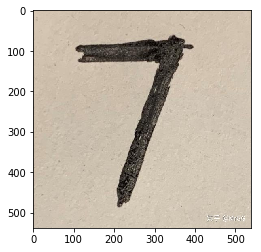

In [72]:
plt.imshow(img)

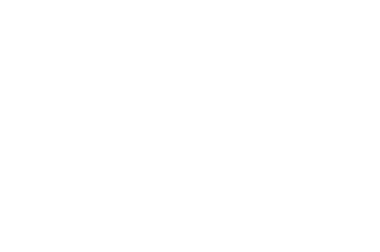

In [73]:
plt.axis('off')
plt.show()

In [74]:
image = np.array(img.resize((28, 28)).convert('L'))

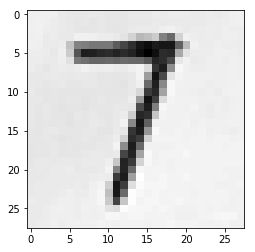

In [75]:
plt.imshow(image, cmap='gray')

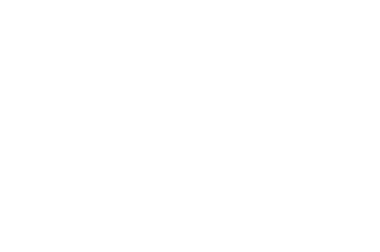

In [76]:
# 不显示坐标
plt.axis('off')
plt.show()

In [77]:
image = (255 - image) / 255.0

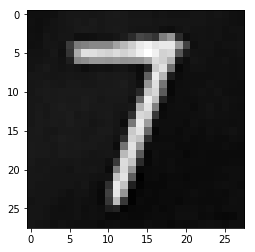

In [78]:
plt.imshow(image, cmap='gray')

In [82]:
image = image.reshape((1, 28, 28, 1))

In [84]:
from tensorflow.keras.models import load_model
model = load_model('mnist.h5')

AttributeError: 'str' object has no attribute 'decode'

In [85]:
prediction = model.predict_classes(image)
print(prediction)

[7]
